# Glacier Meltwater Runoff model
This notebook walks through modelling how meltwater will flow over a glacier and how it will change with different meltwater production.

In [1]:
from landlab.components import FlowDirectorD8, FlowAccumulator, SinkFillerBarnes

from landlab import RasterModelGrid
from landlab.plot.drainage_plot import drainage_plot
from landlab.plot.graph import plot_graph
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

## Create Landlab Raster and load in DEM

In [2]:
# plotting routine to make 3d plot of our surface
def surf_plot(mg,surface='topographic__elevation',title='Ice topography'):
    plt.figure()
    ax=plt.axes(projection='3d')
    
    # plot the surface
    z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((z - z.min()) / (z.max() - z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        z,
        rstride=1,
        cstride=1,
        facecolors=color,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35,azim=-120)
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('elevation')
    plt.title(title)
    plt.show()

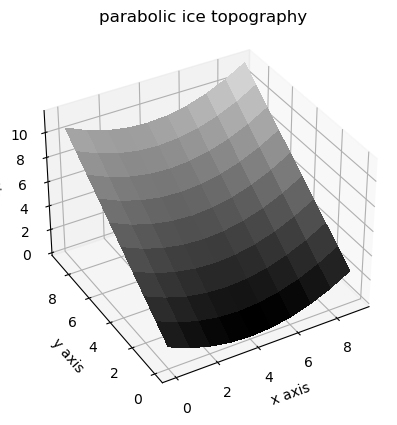

In [3]:
mg1 = RasterModelGrid((10,10))
elev = mg1.add_field("topographic__elevation", mg1.y_of_node+ 0.1 * (mg1.x_of_node-4)**2, at="node",clobber=True)
surf_plot(mg1,title='parabolic ice topography')

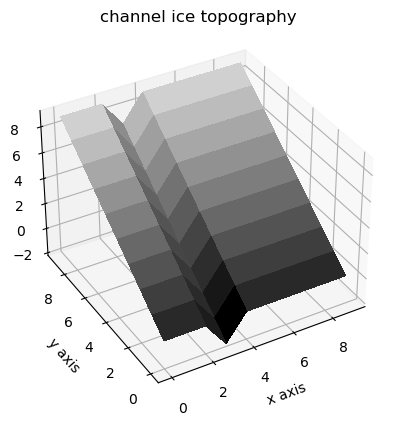

In [4]:
mg2 = RasterModelGrid((10,10))
elev2 = mg2.add_field("topographic__elevation", 1*mg2.y_of_node, at="node",clobber=True)
elev2[(mg2.x_of_node > 2) & (mg1.x_of_node < 4)] -=2
surf_plot(mg2,title='channel ice topography')

In [5]:
fd1 = FlowDirectorD8(mg1,'topographic__elevation')
fd2 = FlowDirectorD8(mg2,'topographic__elevation')

In [13]:
fd1.run_one_step()
receivers = fd1.direct_flow()

fd2.run_one_step()
receivers = fd2.direct_flow()

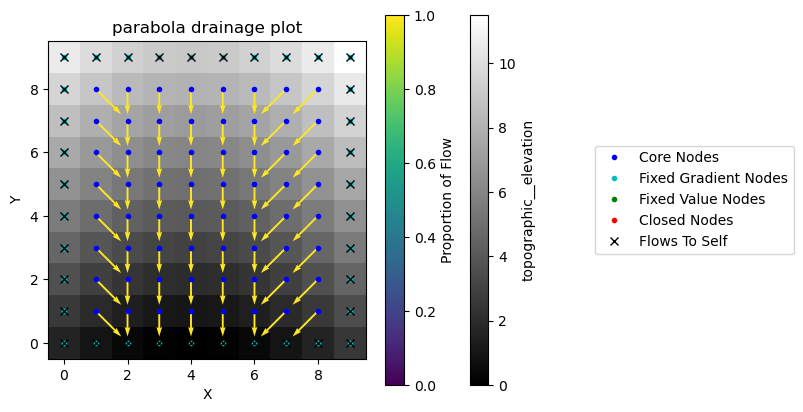

In [10]:
plt.figure()
drainage_plot(mg1,title='parabola drainage plot')

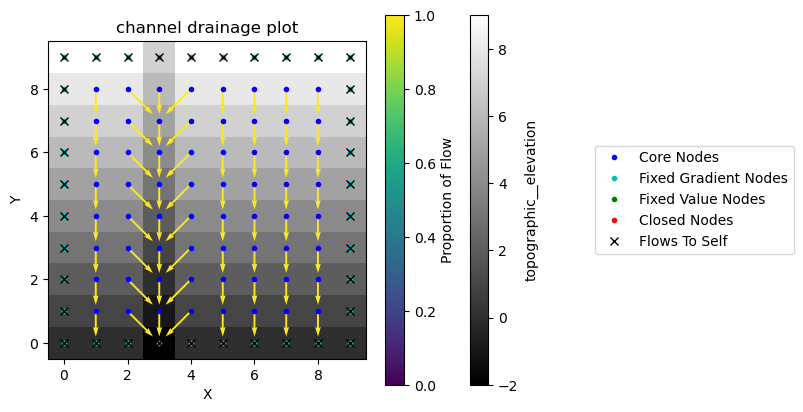

In [12]:
plt.figure()
drainage_plot(mg2,title = 'channel drainage plot')

In [27]:
fa1 = FlowAccumulator(mg1,flow_director='FlowDirectorD8')
fa2 = FlowAccumulator(mg2,flow_director='FlowDirectorD8')

In [28]:
fa1.run_one_step()
(da1,q1) = fa1.accumulate_flow()

fa2.run_one_step()
(da2,q2) = fa2.accumulate_flow()

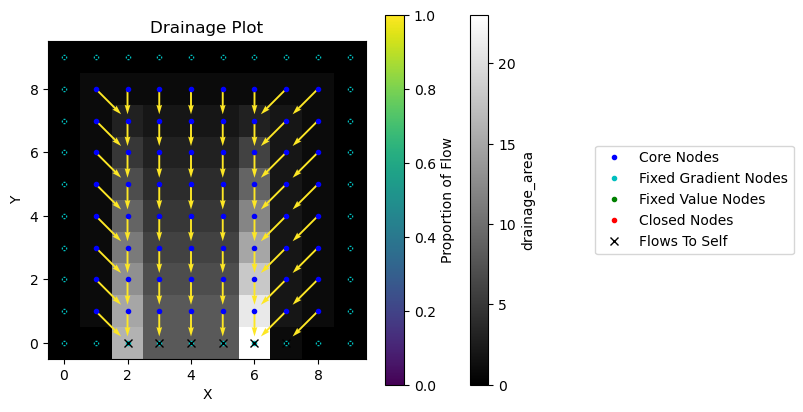

In [29]:
plt.figure()
drainage_plot(mg1,'drainage_area')

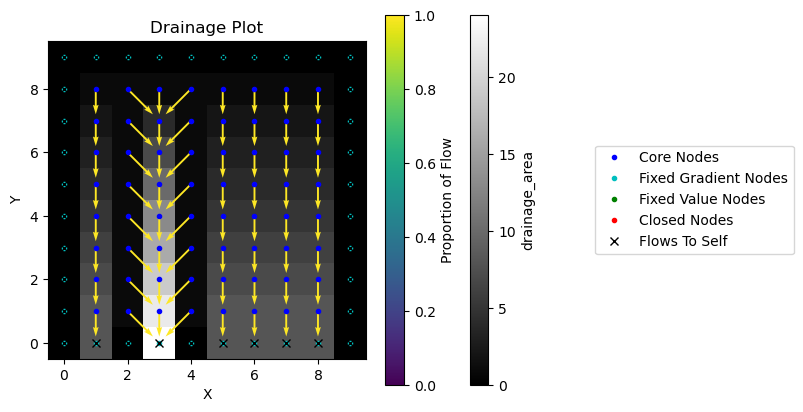

In [30]:
plt.figure()
drainage_plot(mg2,'drainage_area')

In [22]:
mg1.at_node.keys()

['topographic__elevation',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'water__unit_flux_in',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'flow__sink_flag']